<a href="https://colab.research.google.com/github/rafaMESCOBAR/Aplicaciones-Multiplitaforma/blob/main/Teo11_problema_entidad_financiera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ Inteletegencia de negocio/Lab11/Clientes_Banco (1).csv')
df

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,IMPAGO
0,0,57.0,Femenino,Casado,2,27535.3,Si,Impago
1,4,68.0,Femenino,Casado,2,81000.9,No,Impago
2,8,34.0,Masculino,Soltero,0,87467.1,Si,No Impago
3,10,NaN,Masculino,Casado,2,83220.6,No,Impago
4,13,28.0,Femenino,Casado,2,20850.4,No,Impago
...,...,...,...,...,...,...,...,...
1340,4987,38.0,Femenino,Casado,2,84653.1,Si,No Impago
1341,4993,95.0,Femenino,Soltero,2,52997.5,Si,Impago
1342,4996,70.0,Femenino,Casado,1,85192.9,Si,Impago
1343,4998,37.0,Masculino,Casado,0,11693.3,No,No Impago


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       1345 non-null   int64  
 1   EDAD     1327 non-null   float64
 2   SEXO     1313 non-null   object 
 3   CIVIL    1345 non-null   object 
 4   HIJOS    1345 non-null   int64  
 5   INGRESO  1340 non-null   float64
 6   AUTO     1345 non-null   object 
 7   IMPAGO   1345 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 84.2+ KB


<Axes: >

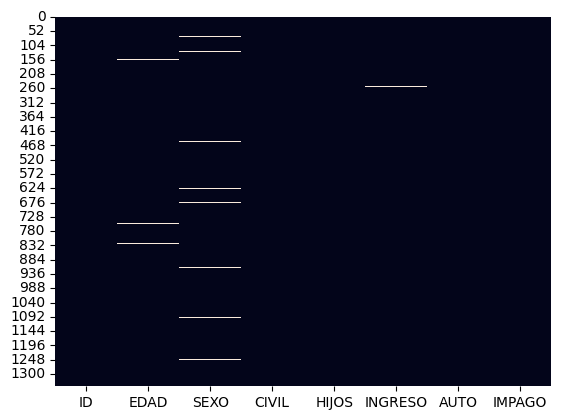

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df.isna().sum()

,0
ID,0
EDAD,18
SEXO,32
CIVIL,0
HIJOS,0
INGRESO,5
AUTO,0
IMPAGO,0


In [9]:
df.groupby(by=['IMPAGO'])['IMPAGO'].count()

,IMPAGO
IMPAGO,
Impago,513
No Impago,832


In [10]:
moda = df['SEXO'].mode()[0]
df['SEXO'] = df['SEXO'].fillna(moda)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       1345 non-null   int64  
 1   EDAD     1327 non-null   float64
 2   SEXO     1345 non-null   object 
 3   CIVIL    1345 non-null   object 
 4   HIJOS    1345 non-null   int64  
 5   INGRESO  1340 non-null   float64
 6   AUTO     1345 non-null   object 
 7   IMPAGO   1345 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 84.2+ KB


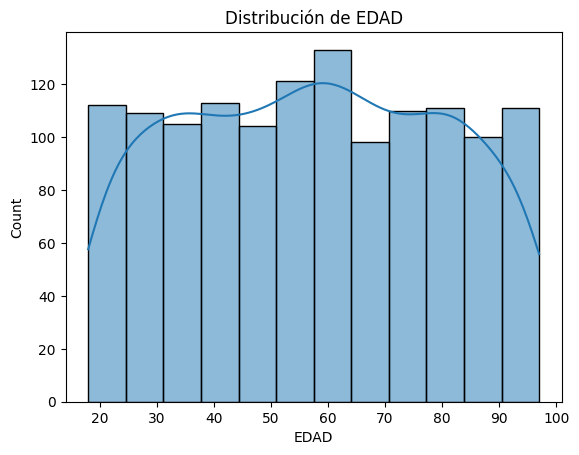

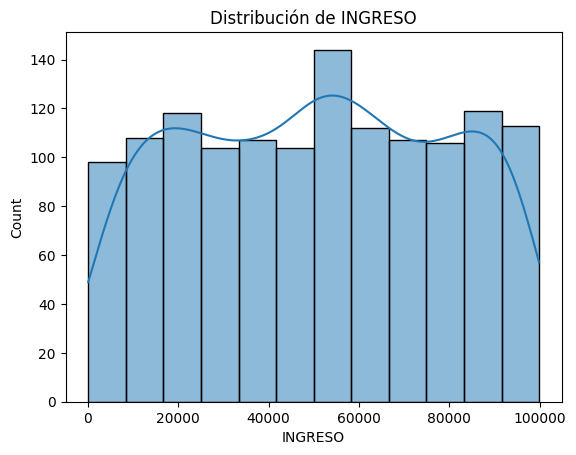

In [12]:
sns.histplot(df['EDAD'], kde=True)
plt.title('Distribución de EDAD')
plt.show()

sns.histplot(df['INGRESO'], kde=True)
plt.title('Distribución de INGRESO')
plt.show()

In [13]:
print(df[['EDAD', 'INGRESO']].describe())


              EDAD       INGRESO
count  1327.000000   1340.000000
mean     57.342879  50656.922592
std      22.726636  28368.847509
min      18.000000    110.284000
25%      38.000000  25854.450000
50%      57.000000  50290.700000
75%      77.000000  75279.825000
max      97.000000  99832.900000


In [14]:
print(df['AUTO'].unique())
print(df['IMPAGO'].unique())


['Si' 'No']
['Impago' 'No Impago']


In [15]:
df['AUTO'] = df['AUTO'].map({'Si': 1, 'No': 0})
df['IMPAGO'] = df['IMPAGO'].map({'Impago': 1, 'No Impago': 0})

In [16]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Selección de columnas
columnas_usadas = ['EDAD', 'INGRESO', 'HIJOS', 'AUTO', 'IMPAGO']
df_knn = df[columnas_usadas].copy()

# Escalado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_knn)

# Imputación con KNN
imputer = KNNImputer(n_neighbors=5)
df_imputado = imputer.fit_transform(df_scaled)

# Desescalado
df_imputado = scaler.inverse_transform(df_imputado)

# Actualización del DataFrame original
df[columnas_usadas] = df_imputado

In [17]:
df

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,IMPAGO
0,0,57.0,Femenino,Casado,2.000000e+00,27535.3,1.0,1.0
1,4,68.0,Femenino,Casado,2.000000e+00,81000.9,0.0,1.0
2,8,34.0,Masculino,Soltero,-1.110223e-16,87467.1,1.0,0.0
3,10,67.6,Masculino,Casado,2.000000e+00,83220.6,0.0,1.0
4,13,28.0,Femenino,Casado,2.000000e+00,20850.4,0.0,1.0
...,...,...,...,...,...,...,...,...
1340,4987,38.0,Femenino,Casado,2.000000e+00,84653.1,1.0,0.0
1341,4993,95.0,Femenino,Soltero,2.000000e+00,52997.5,1.0,1.0
1342,4996,70.0,Femenino,Casado,1.000000e+00,85192.9,1.0,1.0
1343,4998,37.0,Masculino,Casado,-1.110223e-16,11693.3,0.0,0.0


In [18]:
df['EDAD'] = np.floor(df['EDAD']).astype(int)
df['HIJOS'] = df['HIJOS'].round().apply(lambda x: x if x >= 0 else 0).astype(int)


In [19]:
df

,ID,EDAD,SEXO,CIVIL,HIJOS,INGRESO,AUTO,IMPAGO
0,0,57,Femenino,Casado,2,27535.3,1.0,1.0
1,4,68,Femenino,Casado,2,81000.9,0.0,1.0
2,8,34,Masculino,Soltero,0,87467.1,1.0,0.0
3,10,67,Masculino,Casado,2,83220.6,0.0,1.0
4,13,27,Femenino,Casado,2,20850.4,0.0,1.0
...,...,...,...,...,...,...,...,...
1340,4987,38,Femenino,Casado,2,84653.1,1.0,0.0
1341,4993,95,Femenino,Soltero,2,52997.5,1.0,1.0
1342,4996,70,Femenino,Casado,1,85192.9,1.0,1.0
1343,4998,37,Masculino,Casado,0,11693.3,0.0,0.0


In [20]:
df_modelo = pd.get_dummies(df, columns=['SEXO', 'CIVIL'], drop_first=True)
df_modelo

,ID,EDAD,HIJOS,INGRESO,AUTO,IMPAGO,SEXO_Masculino,CIVIL_Soltero
0,0,57,2,27535.3,1.0,1.0,False,False
1,4,68,2,81000.9,0.0,1.0,False,False
2,8,34,0,87467.1,1.0,0.0,True,True
3,10,67,2,83220.6,0.0,1.0,True,False
4,13,27,2,20850.4,0.0,1.0,False,False
...,...,...,...,...,...,...,...,...
1340,4987,38,2,84653.1,1.0,0.0,False,False
1341,4993,95,2,52997.5,1.0,1.0,False,True
1342,4996,70,1,85192.9,1.0,1.0,False,False
1343,4998,37,0,11693.3,0.0,0.0,True,False


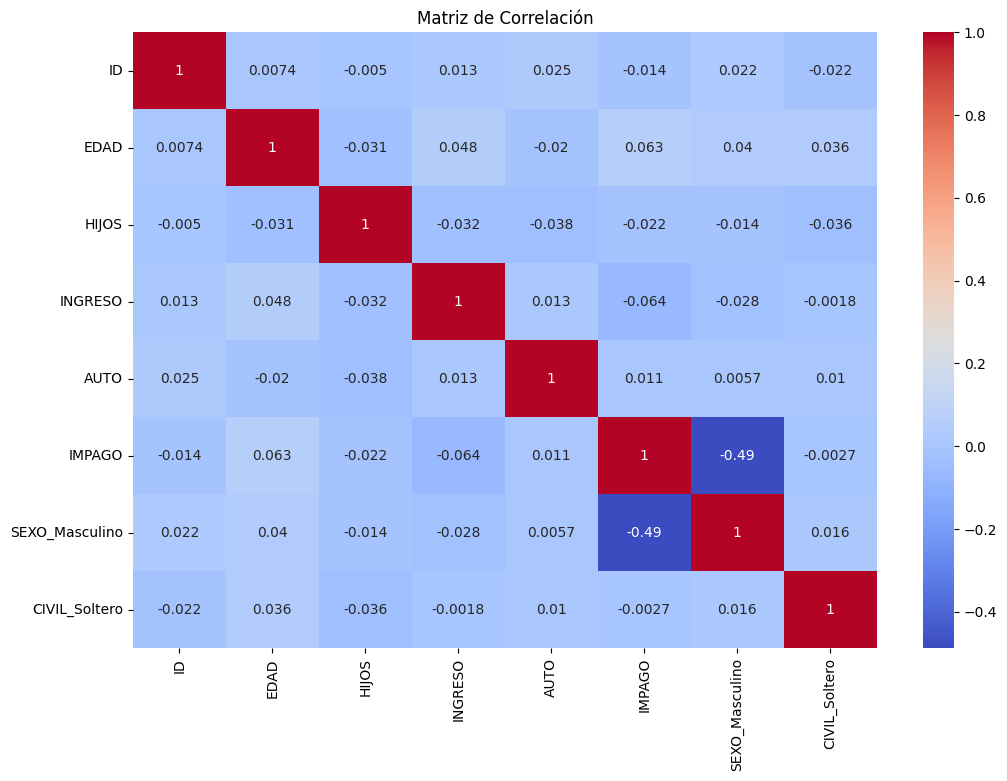

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_modelo.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# X = todas las columnas excepto 'IMPAGO'
X = df_modelo.drop('IMPAGO', axis=1)
y = df_modelo['IMPAGO'].astype(int)  # Aseguramos que sea binaria

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluar
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[129  42]
 [ 24  74]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.80       171
           1       0.64      0.76      0.69        98

    accuracy                           0.75       269
   macro avg       0.74      0.75      0.74       269
weighted avg       0.77      0.75      0.76       269



In [24]:
df_modelo

,ID,EDAD,HIJOS,INGRESO,AUTO,IMPAGO,SEXO_Masculino,CIVIL_Soltero
0,0,57,2,27535.3,1.0,1.0,False,False
1,4,68,2,81000.9,0.0,1.0,False,False
2,8,34,0,87467.1,1.0,0.0,True,True
3,10,67,2,83220.6,0.0,1.0,True,False
4,13,27,2,20850.4,0.0,1.0,False,False
...,...,...,...,...,...,...,...,...
1340,4987,38,2,84653.1,1.0,0.0,False,False
1341,4993,95,2,52997.5,1.0,1.0,False,True
1342,4996,70,1,85192.9,1.0,1.0,False,False
1343,4998,37,0,11693.3,0.0,0.0,True,False
